In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, mean_squared_error, r2_score, mean_absolute_error

In [2]:
df=pd.read_csv('C:\\python\\air_india_reviews\\air_india_reviews.csv')

In [3]:
df.head()

,published_date,rating,type,helpful_votes,title,text
0,2024-03-28T17:44:04-04:00,1,review,0,BAD SERVICE AND BAD HOSPITALITY,From their side my baggage is broken but still...
1,2024-03-28T17:24:01-04:00,1,review,0,AI 188 and AI 187 flight nightmare !,I took AI 188 noon -9th March 2024 - it was de...
2,2024-03-28T16:31:49-04:00,1,review,0,worst airline to travel dont waste ur money,one of worst flight to fly with book one way l...
3,2024-03-27T22:43:53-04:00,3,review,0,"Good, Can be Better!",The positive aspects on my flight were: punctu...
4,2024-03-27T08:12:41-04:00,1,review,0,Poor airlines and services,"Extremally poor services in flight, aircraft i..."


In [4]:
df.drop(columns=['published_date'], inplace = True)

In [5]:
df.head()

,rating,type,helpful_votes,title,text
0,1,review,0,BAD SERVICE AND BAD HOSPITALITY,From their side my baggage is broken but still...
1,1,review,0,AI 188 and AI 187 flight nightmare !,I took AI 188 noon -9th March 2024 - it was de...
2,1,review,0,worst airline to travel dont waste ur money,one of worst flight to fly with book one way l...
3,3,review,0,"Good, Can be Better!",The positive aspects on my flight were: punctu...
4,1,review,0,Poor airlines and services,"Extremally poor services in flight, aircraft i..."


<Axes: ylabel='Density'>

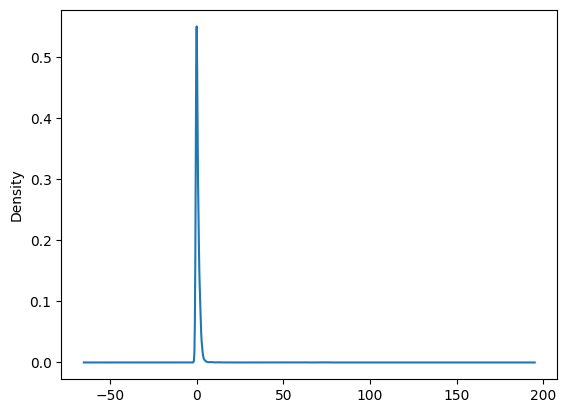

In [6]:
df['helpful_votes'].plot(kind="kde")

In [7]:
df["type"].value_counts()

type
review    4840
Name: count, dtype: int64

In [8]:
# Droping the helpful_votes and type column 

In [9]:
df.drop(columns=['helpful_votes','type'], inplace = True)

In [10]:
df.head()

,rating,title,text
0,1,BAD SERVICE AND BAD HOSPITALITY,From their side my baggage is broken but still...
1,1,AI 188 and AI 187 flight nightmare !,I took AI 188 noon -9th March 2024 - it was de...
2,1,worst airline to travel dont waste ur money,one of worst flight to fly with book one way l...
3,3,"Good, Can be Better!",The positive aspects on my flight were: punctu...
4,1,Poor airlines and services,"Extremally poor services in flight, aircraft i..."


In [11]:
df['rating'].value_counts()

rating
1    2049
4     922
5     739
3     615
2     515
Name: count, dtype: int64

In [12]:
df.duplicated().sum()

0

In [13]:
df.isna().sum()

rating    0
title     0
text      0
dtype: int64

In [14]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [15]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [16]:
ps = PorterStemmer()

In [17]:
import re

In [18]:
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = " ".join(stemmed_content)
    return stemmed_content


In [19]:
df['text'] = df['text'].apply(stemming)

In [20]:
df.head()

,rating,title,text
0,1,BAD SERVICE AND BAD HOSPITALITY,side baggag broken still get baggag claim alre...
1,1,AI 188 and AI 187 flight nightmare !,took ai noon th march delay left pm miss conne...
2,1,worst airline to travel dont waste ur money,one worst flight fli book one way last minut t...
3,3,"Good, Can be Better!",posit aspect flight punctual polit effici infl...
4,1,Poor airlines and services,extrem poor servic flight aircraft old broken ...


In [21]:
df['title'] = df['title'].apply(stemming)

In [22]:
df.head()

,rating,title,text
0,1,bad servic bad hospit,side baggag broken still get baggag claim alre...
1,1,ai ai flight nightmar,took ai noon th march delay left pm miss conne...
2,1,worst airlin travel dont wast ur money,one worst flight fli book one way last minut t...
3,3,good better,posit aspect flight punctual polit effici infl...
4,1,poor airlin servic,extrem poor servic flight aircraft old broken ...


In [23]:
# joining the title and text columns

In [24]:
df["Text"] = df['title'] + " " + df['text']

In [25]:
df.head()

,rating,title,text,Text
0,1,bad servic bad hospit,side baggag broken still get baggag claim alre...,bad servic bad hospit side baggag broken still...
1,1,ai ai flight nightmar,took ai noon th march delay left pm miss conne...,ai ai flight nightmar took ai noon th march de...
2,1,worst airlin travel dont wast ur money,one worst flight fli book one way last minut t...,worst airlin travel dont wast ur money one wor...
3,3,good better,posit aspect flight punctual polit effici infl...,good better posit aspect flight punctual polit...
4,1,poor airlin servic,extrem poor servic flight aircraft old broken ...,poor airlin servic extrem poor servic flight a...


In [26]:
df.drop(columns=['text','title'],inplace=True)

In [27]:
df.head()

,rating,Text
0,1,bad servic bad hospit side baggag broken still...
1,1,ai ai flight nightmar took ai noon th march de...
2,1,worst airlin travel dont wast ur money one wor...
3,3,good better posit aspect flight punctual polit...
4,1,poor airlin servic extrem poor servic flight a...


In [52]:
df.shape

(4840, 2)

In [44]:
X = df['Text']
Y = df['rating']

In [53]:
X_train , X_test , Y_train , Y_test  = train_test_split(X, Y, test_size = 0.2 , stratify = Y , random_state = 42)

In [54]:
X_train.shape

(3872,)

In [55]:
X_test.shape

(968,)

In [56]:
# Vectorization 

In [57]:
vc = TfidfVectorizer()
X_train = vc.fit_transform(X_train)
X_test = vc.transform(X_test)

In [58]:
X_train

<3872x8722 sparse matrix of type '<class 'numpy.float64'>'
	with 166778 stored elements in Compressed Sparse Row format>

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error

# Best parameters that i have found using GridSearchCV
best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}

# Initialize the Random Forest regressor with best parameters
best_rf = RandomForestRegressor(random_state=42, **best_params)

# Fit the model on the training data
best_rf.fit(X_train, Y_train)

# Evaluate the model on the test set
y_pred_test = best_rf.predict(X_test)
r2 = r2_score(Y_test, y_pred_test)
mae = mean_absolute_error(Y_test, y_pred_test)
print(f"Best Model R-squared = {r2:.2f}, MAE = {mae:.2f}")


Best Model R-squared = 0.71, MAE = 0.59


In [89]:
def predict_review(x):
    x=stemming(x)
    x=vc.transform([x])
    print(int(best_rf.predict(x)[0]))

In [90]:
predict_review("this is a very good airline")

4


In [91]:
predict_review("the worst airline in the world very bad experince")

1


In [94]:
predict_review("the airline did a fair job lots of scope for improvement")

2
